In [11]:
import pandas as pd
from matplotlib.figure import Figure
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from copy import copy
from select_molecole_entity_value import select_molecule_entity_value

#建立连接
conn = pymysql.connect(
	host="114.116.114.149",
	port=10022,
	user="exomics_admin",
	passwd="exomics_2022",
	db='exOmics'
)

#设定要查询的数据类型和基因
gene = 'ENSG00000000457' #基因主页所对应的基因
feature = 'altp' #此处值是范例，实际上需要根据网页决定
dataset = 'gse68086' #此处值是范例，实际上需要根据网页决定
specimen = 'tep' #此处值是范例，实际上需要根据网页决定

#以下变量由上述选择自动决定，因为具有关联性
# molecule = 'cfrna'
# entity = 'entity'
# value = 'count'
molecule, entity, value = select_molecule_entity_value(dataset, feature, specimen, conn)


#根据以上条件查询所有可能的疾病类型
sql_disease = f"""
	SELECT ori.Disease_condition
	FROM (
        SELECT SUBSTRING_INDEX(TABLE_NAME,'-',1) AS NT,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-6),'-',1) AS Omics,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-5),'-',1) AS Dataset,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-4),'-',1) AS Entity,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-3),'-',1) AS Disease_condition,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-2),'-',1) AS Specimen,
			SUBSTRING_INDEX(TABLE_NAME,'-',-1) AS Value_type
		FROM information_schema.`TABLES`
		WHERE table_schema='exOmics'
			AND (
                TABLE_NAME LIKE '%gse%'
				OR TABLE_NAME LIKE '%prjeb%'
				OR TABLE_NAME LIKE '%prjna%'
				OR TABLE_NAME LIKE '%gse%'
				OR TABLE_NAME LIKE '%srp%'
				OR TABLE_NAME LIKE '%pxd%'
            )
            AND TABLE_NAME NOT LIKE '%gsea%'
        )ori
	WHERE Dataset LIKE '%{dataset}%'
		AND Omics LIKE '%{feature}%'
        AND Disease_condition NOT LIKE '%mean%'
"""
diseases = pd.read_sql_query(sql_disease, conn)

#查询语句
diseases_data = pd.DataFrame()
for disease in diseases['Disease_condition']:
	query_sql = f"""
		SELECT c.*
		FROM `{molecule}-{feature}-{dataset}-{entity}-{disease}-{specimen}-{value}` c, gene_index g
		WHERE c.feature LIKE CONCAT('%',g.ensembl_gene_id,'%')
			AND g.ensembl_gene_id LIKE '%{gene}%'
	"""
	temp = pd.read_sql_query(query_sql, conn).set_index('feature').astype('float').mean(axis=1)
	temp = temp.to_frame()
	temp.columns = [disease.upper()]
	diseases_data = pd.concat([diseases_data,temp],axis=1)
diseases_data = diseases_data.T

/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQL

/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQL

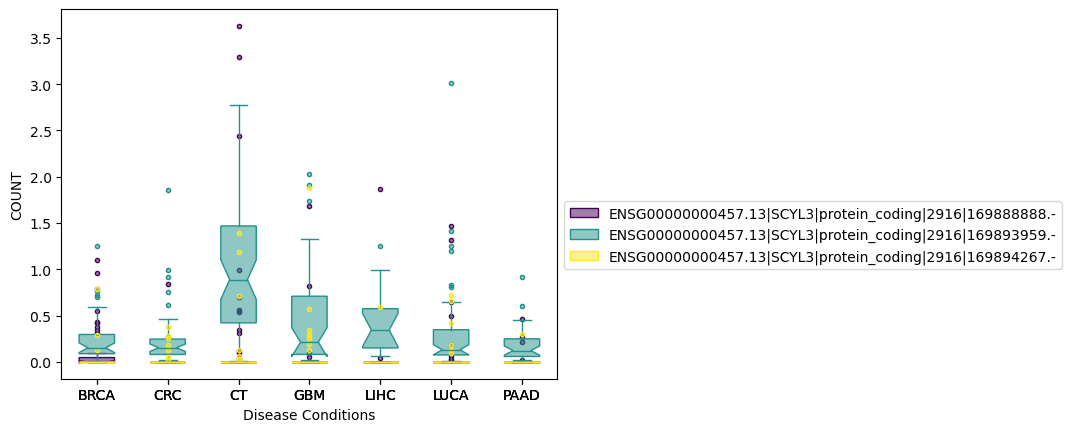

In [15]:

#! 需要注意的是, boxplot在设计中有2种形式, 即一般的boxplot和堆叠的boxplot。具体设计在「数据展示形式」ppt中有。
#* 这里的代码是堆叠的batplot，适用于Alt.promoter, Chimeric RNA, Editing, Splicing（第二类数据）

import pandas as pd
from matplotlib.figure import Figure
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from copy import copy
from select_molecole_entity_value import select_molecule_entity_value

#建立连接
conn = pymysql.connect(
	host="114.116.114.149",
	port=10022,
	user="exomics_admin",
	passwd="exomics_2022",
	db='exOmics'
)

#设定要查询的数据类型和基因
gene = 'ENSG00000000457' #基因主页所对应的基因
feature = 'altp' #此处值是范例，实际上需要根据网页决定
dataset = 'gse68086' #此处值是范例，实际上需要根据网页决定
specimen = 'tep' #此处值是范例，实际上需要根据网页决定

#以下变量由上述选择自动决定，因为具有关联性
# molecule = 'cfrna'
# entity = 'entity'
# value = 'count'
molecule, entity, value = select_molecule_entity_value(dataset, feature, specimen, conn)


#根据以上条件查询所有可能的疾病类型
sql_disease = f"""
	SELECT ori.Disease_condition
	FROM (
        SELECT SUBSTRING_INDEX(TABLE_NAME,'-',1) AS NT,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-6),'-',1) AS Omics,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-5),'-',1) AS Dataset,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-4),'-',1) AS Entity,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-3),'-',1) AS Disease_condition,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-2),'-',1) AS Specimen,
			SUBSTRING_INDEX(TABLE_NAME,'-',-1) AS Value_type
		FROM information_schema.`TABLES`
		WHERE table_schema='exOmics'
			AND (
                TABLE_NAME LIKE '%gse%'
				OR TABLE_NAME LIKE '%prjeb%'
				OR TABLE_NAME LIKE '%prjna%'
				OR TABLE_NAME LIKE '%gse%'
				OR TABLE_NAME LIKE '%srp%'
				OR TABLE_NAME LIKE '%pxd%'
            )
            AND TABLE_NAME NOT LIKE '%gsea%'
        )ori
	WHERE Dataset LIKE '%{dataset}%'
		AND Omics LIKE '%{feature}%'
        AND Disease_condition NOT LIKE '%mean%'
"""
diseases = pd.read_sql_query(sql_disease, conn)

#查询语句
diseases_data = {}
for disease in diseases['Disease_condition']:
	query_sql = f"""
		SELECT c.*
		FROM `{molecule}-{feature}-{dataset}-{entity}-{disease}-{specimen}-{value}` c, gene_index g
		WHERE c.feature LIKE CONCAT('%',g.ensembl_gene_id,'%')
			AND g.ensembl_gene_id LIKE '%{gene}%'
	"""
	temp = pd.read_sql_query(query_sql, conn) #选择某个疾病类型下的某个基因的所有样本的值，应当是1*n的矩阵
	fentities = list(temp['feature'])
	for fentity in fentities:
		if fentity not in diseases_data.keys():
			diseases_data[fentity] = {}
		diseases_data[fentity][disease.upper()] = list(temp[temp['feature']==fentity].iloc[0,1:].astype('float'))


#作图
#将获得一个多行多列的表，每一行代表一个entity，每一列代表一个样本或一个疾病类型（当disease是mean时）。因此做barplot选择做dodged barplot (即grouped bat chart)。
features, out_data = diseases_data.keys(), diseases_data.values()
fig = Figure()
ax = fig.subplots()
cmap = cm.get_cmap('viridis',len(features))
colors = cmap(np.linspace(0, 1, len(features)))
colors[:,-1] = 0.5
elements = []
for i in range(len(features)): #对于每个entity
    feature = list(features)[i]
    labels, data = diseases_data[feature].keys(), diseases_data[feature].values()
    color = colors[i,:]
    color_notrans = copy(color)
    color_notrans[-1] = 1
    elements.append(ax.boxplot(data,
        notch=True,
        patch_artist=True,
        labels=labels,
        boxprops={'facecolor':color,'edgecolor':color_notrans},
        flierprops={'marker':'.', 'markerfacecolor': color, 'markeredgecolor': color_notrans},
        medianprops = {'color': color_notrans},
        capprops={'color':color_notrans},
        whiskerprops={'color':color_notrans}))
    ax.set_xlabel('Disease Conditions')
    ax.set_ylabel(f'{value.upper()}')
colors_notrans = copy(colors)
colors_notrans[:,-1] = 1
ax.legend([element["boxes"][0] for element in elements],
    [list(features)[idx] for idx in range(len(features))],
    bbox_to_anchor=(1, 0.5),
    loc='best'
)
fig

/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQL

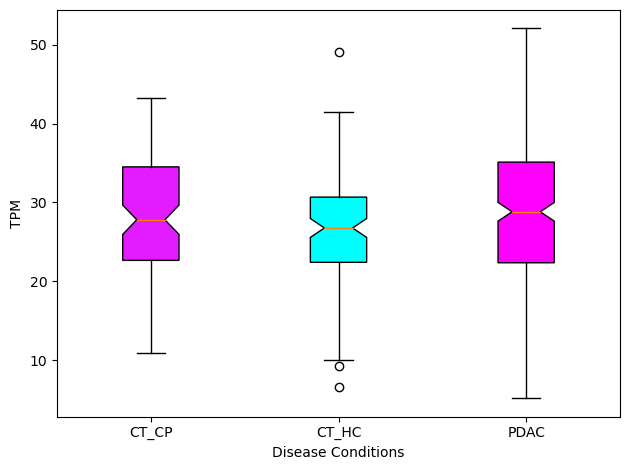

In [17]:
#! 需要注意的是, boxplot在设计中有2种形式, 即一般的boxplot和堆叠的boxplot。具体设计在「数据展示形式」ppt中有。

#* 这里的代码是非堆叠的batplot，适用于Alt.polyadenylation, BS-seq, DIP-seq, Fragment size, NO, Expression（第一类数据）

import pandas as pd
from matplotlib.figure import Figure
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from select_molecole_entity_value import select_molecule_entity_value

#建立连接
conn = pymysql.connect(
	host="114.116.114.149",
	port=10022,
	user="exomics_admin",
	passwd="exomics_2022",
	db='exOmics'
)

#设定要查询的数据类型和基因
gene = 'ENSG00000001629' #基因主页所对应的基因
feature = 'expr' #此处值是范例，实际上需要根据网页决定
dataset = 'gse133684' #此处值是范例，实际上需要根据网页决定
specimen = 'ev' #此处值是范例，实际上需要根据网页决定

#以下变量由上述选择自动决定，因为具有关联性
# molecule = 'cfrna'
# entity = 'gene'
# value = 'tpm'
molecule, entity, value = select_molecule_entity_value(dataset, feature, specimen, conn)


#根据以上条件查询所有可能的疾病类型
sql_disease = f"""
	SELECT ori.Disease_condition
	FROM (
        SELECT SUBSTRING_INDEX(TABLE_NAME,'-',1) AS NT,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-6),'-',1) AS Omics,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-5),'-',1) AS Dataset,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-4),'-',1) AS Entity,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-3),'-',1) AS Disease_condition,
			SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-2),'-',1) AS Specimen,
			SUBSTRING_INDEX(TABLE_NAME,'-',-1) AS Value_type
		FROM information_schema.`TABLES`
		WHERE table_schema='exOmics'
            AND (
                TABLE_NAME LIKE '%gse%'
				OR TABLE_NAME LIKE '%prjeb%'
				OR TABLE_NAME LIKE '%prjna%'
				OR TABLE_NAME LIKE '%gse%'
				OR TABLE_NAME LIKE '%srp%'
				OR TABLE_NAME LIKE '%pxd%'
            )
            AND TABLE_NAME NOT LIKE '%gsea%'
        )ori
	WHERE Dataset LIKE '%{dataset}%'
		AND Omics LIKE '%{feature}%'
        AND Disease_condition NOT LIKE '%mean%'
"""
diseases = pd.read_sql_query(sql_disease, conn)

#查询语句
diseases_data = {}
for disease in diseases['Disease_condition']:
	query_sql = f"""
		SELECT c.*
		FROM `{molecule}-{feature}-{dataset}-{entity}-{disease}-{specimen}-{value}` c, gene_index g
		WHERE c.feature LIKE CONCAT('%',g.ensembl_gene_id,'%')
			AND g.ensembl_gene_id LIKE '%{gene}%'
	"""
	temp = pd.read_sql_query(query_sql, conn) #选择某个疾病类型下的某个基因的所有样本的值，应当是1*n的矩阵
	diseases_data[disease.upper()] = list(temp.iloc[0,1:].astype('float'))


#作图
#将获得一个多行多列的表，每一行代表一个entity，每一列代表一个样本或一个疾病类型（当disease是mean时）。因此做barplot选择做dodged barplot (即grouped bat chart)。



labels, data = diseases_data.keys(), diseases_data.values() #Drawing data
fig = Figure()
ax = fig.subplots()

#Boxplot
plotfig = ax.boxplot(data,notch=True,patch_artist=True,labels=labels)

ax.set_xlabel('Disease Conditions')
ax.set_ylabel(f'{value.upper()}')

#Fill color
cmap = cm.ScalarMappable(cmap=mpl.cm.cool)
test_mean = [np.mean(x) for x in data]
for patch, color in zip(plotfig['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
fig.tight_layout()
fig

/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQL

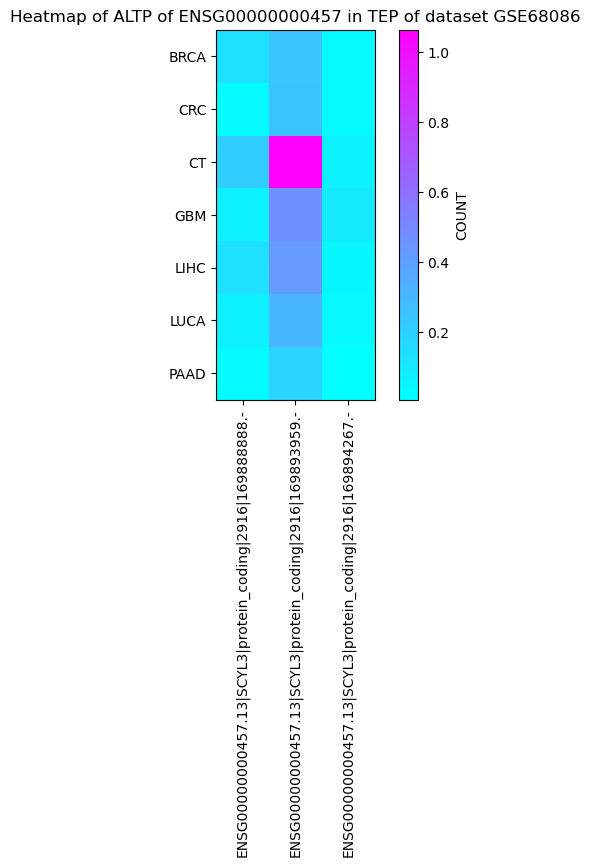

In [19]:
import pandas as pd
from matplotlib.figure import Figure
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from copy import copy
from select_molecole_entity_value import select_molecule_entity_value


conn = pymysql.connect(
    host="114.116.114.149",
    port=10022,
    user="exomics_admin",
    passwd="exomics_2022",
    db='exOmics'
)

def heatmap(gene, feature, dataset, specimen, conn):
    """
    #设定要查询的数据类型和基因
    gene = 'ENSG00000000457' #基因主页所对应的基因
    feature = 'altp' #此处值是范例，实际上需要根据网页决定
    dataset = 'gse68086' #此处值是范例，实际上需要根据网页决定
    specimen = 'tep' #此处值是范例，实际上需要根据网页决定
    """

    #以下变量由上述选择自动决定，因为具有关联性
    # molecule = 'cfrna'
    # entity = 'entity'
    # value = 'count'
    #建立连接


    #with conn:
    molecule, entity, value = select_molecule_entity_value(dataset, feature, specimen, conn)


    #根据以上条件查询所有可能的疾病类型
    sql_disease = f"""
        SELECT ori.Disease_condition
        FROM (
            SELECT SUBSTRING_INDEX(TABLE_NAME,'-',1) AS NT,
                SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-6),'-',1) AS Omics,
                SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-5),'-',1) AS Dataset,
                SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-4),'-',1) AS Entity,
                SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-3),'-',1) AS Disease_condition,
                SUBSTRING_INDEX(SUBSTRING_INDEX(TABLE_NAME,'-',-2),'-',1) AS Specimen,
                SUBSTRING_INDEX(TABLE_NAME,'-',-1) AS Value_type
            FROM information_schema.`TABLES`
            WHERE table_schema='exOmics'
                AND (
                    TABLE_NAME LIKE '%gse%'
                    OR TABLE_NAME LIKE '%prjeb%'
                    OR TABLE_NAME LIKE '%prjna%'
                    OR TABLE_NAME LIKE '%gse%'
                    OR TABLE_NAME LIKE '%srp%'
                    OR TABLE_NAME LIKE '%pxd%'
                )
                AND TABLE_NAME NOT LIKE '%gsea%'
            )ori
        WHERE Dataset LIKE '%{dataset}%'
            AND Omics LIKE '%{feature}%'
            AND Disease_condition NOT LIKE '%mean%'
    """
    diseases = pd.read_sql_query(sql_disease, conn)

    #查询语句
    diseases_data = pd.DataFrame()
    for disease in diseases['Disease_condition']:
        query_sql = f"""
            SELECT c.*
            FROM `{molecule}-{feature}-{dataset}-{entity}-{disease}-{specimen}-{value}` c, gene_index g
            WHERE c.feature LIKE CONCAT('%',g.ensembl_gene_id,'%')
                AND g.ensembl_gene_id LIKE '%{gene}%'
        """
        temp = pd.read_sql_query(query_sql, conn).set_index('feature').astype('float').mean(axis=1)
        temp = temp.to_frame()
        temp.columns = [disease.upper()]
        diseases_data = pd.concat([diseases_data,temp],axis=1)
    diseases_data = diseases_data.T

    #作图
    fig = Figure()
    ax = fig.subplots()
    xLabel = diseases_data.columns.to_list()
    yLabel = diseases_data.index.to_list()

    im = ax.imshow(diseases_data.values, cmap=plt.cm.cool)
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel,rotation=90)
    fig.colorbar(im,label=value.upper())
    ax.set_title(f"Heatmap of {feature.upper()} of {gene.upper()} in {specimen.upper()} of dataset {dataset.upper()}")
    fig.tight_layout()
    return fig

In [87]:
diseases_data.values

array([[0.13774559, 0.24872782, 0.03104218],
       [0.02639793, 0.25235229, 0.03070052],
       [0.21779862, 1.06421165, 0.05894697],
       [0.0664337 , 0.46444915, 0.09894075],
       [0.1367335 , 0.42605836, 0.04202814],
       [0.07015402, 0.30903122, 0.03698462],
       [0.02776203, 0.19107094, 0.00852894]])

In [88]:
len(yLabel)

7

In [3]:
from tableBar import tableBar
from stackBox import stackBox
from heatMap import heatMap
import pymysql
import pandas

In [13]:
#建立连接
conn = pymysql.connect(
	host="114.116.114.149",
	port=10022,
	user="exomics_admin",
	passwd="exomics_2022",
	db='exOmics'
)

fig = heatMap('ENSG00000000457', 'altp', 'gse68086', 'tep', conn)
fig

/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/limingyang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQL

<Figure size 640x480 with 2 Axes>

In [10]:
print(fig)

Figure(640x480)
